# Generación 1
#### Álvaro Corrochano López, Pablo Álvarez García y Antonio Fernández Martín

In [1]:
import networkx as nx
import itertools as it

In [2]:
# Importo Beautiful Soup
from bs4 import BeautifulSoup
# Importo requests para pillar el código html de donde quiera
import requests

# Cogemos la Pokédex
webDex = requests.get('https://pokemondb.net/pokedex/national')
dexSoup  = BeautifulSoup(webDex.content, 'html.parser')

In [3]:
pokedex = {}
types = [['itype', 'grass'], ['itype', 'poison'], ['itype', 'fire'], ['itype', 'flying'], ['itype', 'water'], 
         ['itype', 'bug'], ['itype', 'normal'], ['itype', 'electric'], ['itype', 'ground'], ['itype', 'fairy'], 
         ['itype', 'fighting'], ['itype', 'psychic'], ['itype', 'rock'], ['itype', 'steel'], 
         ['itype', 'ice'], ['itype', 'ghost'], ['itype', 'dark'], ['itype', 'dragon']]

for name in dexSoup.find_all('a'):
    if name.get('class') == ['ent-name']:
        pok = name.get_text()
        pokedex[pok] = {'type1' : 'None', 'type2' : 'None'}
    if name.get('class') in types:
        if pokedex[pok]['type1'] == 'None':
            pokedex[pok]['type1'] = name.get_text()
        else:
            pokedex[pok]['type2'] = name.get_text()

In [4]:
print(pokedex)

{'Bulbasaur': {'type1': 'Grass', 'type2': 'Poison'}, 'Ivysaur': {'type1': 'Grass', 'type2': 'Poison'}, 'Venusaur': {'type1': 'Grass', 'type2': 'Poison'}, 'Charmander': {'type1': 'Fire', 'type2': 'None'}, 'Charmeleon': {'type1': 'Fire', 'type2': 'None'}, 'Charizard': {'type1': 'Fire', 'type2': 'Flying'}, 'Squirtle': {'type1': 'Water', 'type2': 'None'}, 'Wartortle': {'type1': 'Water', 'type2': 'None'}, 'Blastoise': {'type1': 'Water', 'type2': 'None'}, 'Caterpie': {'type1': 'Bug', 'type2': 'None'}, 'Metapod': {'type1': 'Bug', 'type2': 'None'}, 'Butterfree': {'type1': 'Bug', 'type2': 'Flying'}, 'Weedle': {'type1': 'Bug', 'type2': 'Poison'}, 'Kakuna': {'type1': 'Bug', 'type2': 'Poison'}, 'Beedrill': {'type1': 'Bug', 'type2': 'Poison'}, 'Pidgey': {'type1': 'Normal', 'type2': 'Flying'}, 'Pidgeotto': {'type1': 'Normal', 'type2': 'Flying'}, 'Pidgeot': {'type1': 'Normal', 'type2': 'Flying'}, 'Rattata': {'type1': 'Normal', 'type2': 'None'}, 'Raticate': {'type1': 'Normal', 'type2': 'None'}, 'Spear

# 1 vs 1 Teams

In [5]:
teams = []
apariciones = {}

# === [gen1ou] by EB0LA ===

team1 = []

team1.append('Exeggutor')  
team1.append('Starmie')
team1.append('Jolteon')  

teams.append(team1)

# === [gen1ou] by EB0LA ===

team2 = []

team2.append('Exeggutor')  
team2.append('Tauros')  
team2.append('Jolteon')  

teams.append(team2)

# === [gen1ou] EggyCunoBro ===

team3 = []

team3.append('Exeggutor')
team3.append('Articuno')  
team3.append('Slowbro')

teams.append(team3)

In [6]:
print(teams)

[['Exeggutor', 'Starmie', 'Jolteon'], ['Exeggutor', 'Tauros', 'Jolteon'], ['Exeggutor', 'Articuno', 'Slowbro']]


In [7]:
G = nx.Graph()

In [8]:
for team in teams:
    for pok in team:
        if(pok in apariciones):
            apariciones[pok] += 1
        else:
            apariciones[pok] = 1
        G.add_node(pok, type1 = pokedex[pok]['type1'], type2 = pokedex[pok]['type2'])

In [9]:
edgeList = []
for team in teams:
    edgeList.append([x for x in it.combinations(team, 2)])

In [10]:
for perm in edgeList :
    for pokPair in perm :
        if G.has_edge(pokPair[0], pokPair[1]):
            G[pokPair[0]][pokPair[1]]['weight'] += 1
        else:
            G.add_edge(pokPair[0], pokPair[1], weight = 1)
G.edges.data('weight')

EdgeDataView([('Exeggutor', 'Starmie', 1), ('Exeggutor', 'Jolteon', 2), ('Exeggutor', 'Tauros', 1), ('Exeggutor', 'Articuno', 1), ('Exeggutor', 'Slowbro', 1), ('Starmie', 'Jolteon', 1), ('Jolteon', 'Tauros', 1), ('Articuno', 'Slowbro', 1)])

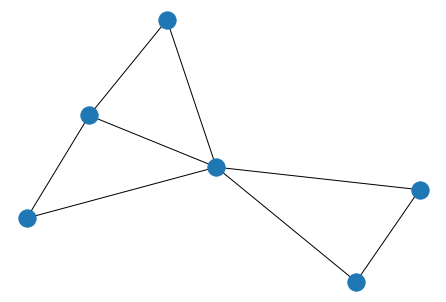

In [11]:
nx.draw(G)

# LC Teams

In [12]:
teams = []

# === [gen1lc] Psy Attack! [MarceloDK] ===

team1 = []

team1.append('Drowzee')
team1.append('Slowpoke')
team1.append('Abra')  
team1.append('Exeggcute') 
team1.append('Staryu')  
team1.append('Diglett')  

teams.append(team1)

In [13]:
for team in teams:
    for pok in team:
        if(pok in apariciones):
            apariciones[pok] += 1
        else:
            apariciones[pok] = 1
        G.add_node(pok, type1 = pokedex[pok]['type1'], type2 = pokedex[pok]['type2'])

In [14]:
edgeList = []
for team in teams:
    edgeList.append([x for x in it.combinations(team, 2)])

In [15]:
for perm in edgeList :
    for pokPair in perm :
        if G.has_edge(pokPair[0], pokPair[1]):
            G[pokPair[0]][pokPair[1]]['weight'] += 1
        else:
            G.add_edge(pokPair[0], pokPair[1], weight = 1)
G.edges.data('weight')

EdgeDataView([('Exeggutor', 'Starmie', 1), ('Exeggutor', 'Jolteon', 2), ('Exeggutor', 'Tauros', 1), ('Exeggutor', 'Articuno', 1), ('Exeggutor', 'Slowbro', 1), ('Starmie', 'Jolteon', 1), ('Jolteon', 'Tauros', 1), ('Articuno', 'Slowbro', 1), ('Drowzee', 'Slowpoke', 1), ('Drowzee', 'Abra', 1), ('Drowzee', 'Exeggcute', 1), ('Drowzee', 'Staryu', 1), ('Drowzee', 'Diglett', 1), ('Slowpoke', 'Abra', 1), ('Slowpoke', 'Exeggcute', 1), ('Slowpoke', 'Staryu', 1), ('Slowpoke', 'Diglett', 1), ('Abra', 'Exeggcute', 1), ('Abra', 'Staryu', 1), ('Abra', 'Diglett', 1), ('Exeggcute', 'Staryu', 1), ('Exeggcute', 'Diglett', 1), ('Staryu', 'Diglett', 1)])

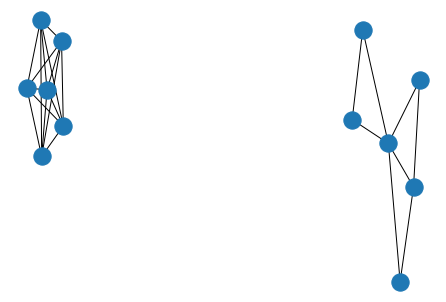

In [16]:
nx.draw(G)

# Monotype Teams

In [17]:
teams = []

# === [gen1monotype] [PvK] Normal with Kang ===

t1 = []

t1.append('Chansey')
t1.append('Snorlax')  
t1.append('Tauros')
t1.append('Persian')
t1.append('Dodrio')
t1.append('Kangaskhan')

teams.append(t1)

# === [gen1monotype] [PvK] Psychic with Mr. Mime ===

t2 = []

t2.append('Jynx')  
t2.append('Alakazam')
t2.append('Exeggutor')  
t2.append('Starmie')  
t2.append('Slowbro')  
t2.append('Mr. Mime')  
 
teams.append(t2)

# === [gen1monotype] [PvK] Water LeadWrath ===

t3 = []

t3.append('Poliwrath')  
t3.append('Starmie')  
t3.append('Cloyster')  
t3.append('Lapras')  
t3.append('Slowbro')  
t3.append('Gyarados')  

teams.append(t3)

# === [gen1monotype] [PvK] Fire Toxic+FSpin ===

t4 = []

t4.append('Charizard') 
t4.append('Magmar')  
t4.append('Ninetales')  
t4.append('Moltres')
t4.append('Arcanine')  
t4.append('Rapidash')  

teams.append(t4)

# === [gen1monotype] [PvK] Flying LeadZard ===

t5 = []

t5.append('Charizard')  
t5.append('Zapdos')
t5.append('Dodrio')  
t5.append('Articuno')  
t5.append('Moltres')  
t5.append('Dragonite')

teams.append(t5)

# === [gen1monotype] [PvK] Electric ScreechBoom Trode ===

t6 = []
          
t6.append('Electrode')  
t6.append('Jolteon')  
t6.append('Zapdos')  
t6.append('Raichu')
t6.append('Electabuzz')  
t6.append('Magneton')  
 
teams.append(t6)

# === [gen1monotype] [PvK] Rock LeadAero ===

t7 = []

t7.append('Aerodactyl')
t7.append('Rhydon')
t7.append('Golem')  
t7.append('Omastar')  
t7.append('Onix')  
t7.append('Kabutops')  

teams.append(t7)          

# === [gen1monotype] [PvK] Ground Lead Bind Onix ===
          
t8 = []

t8.append('Onix')  
t8.append('Rhydon')  
t8.append('Golem')  
t8.append('Dugtrio')  
t8.append('Nidoking')
t8.append('Sandslash')  

teams.append(t8)

# === [gen1monotype] [PvK] Poison Tent+Veno ===

t9 = []

t9.append('Tentacruel')  
t9.append('Venomoth') 
t9.append('Victreebel')  
t9.append('Gengar')  
t9.append('Muk')  
t9.append('Nidoking')  

teams.append(t9)

In [18]:
print(len(teams))

9


In [19]:
for team in teams:
    for pok in team:
        if(pok in apariciones):
            apariciones[pok] += 1
        else:
            apariciones[pok] = 1
        G.add_node(pok, type1 = pokedex[pok]['type1'], type2 = pokedex[pok]['type2'])
        
        
edgeList = []
for team in teams:
    edgeList.append([x for x in it.combinations(team, 2)])

for perm in edgeList :
    for pokPair in perm :
        if G.has_edge(pokPair[0], pokPair[1]):
            G[pokPair[0]][pokPair[1]]['weight'] += 1
        else:
            G.add_edge(pokPair[0], pokPair[1], weight = 1)
G.edges.data('weight')

EdgeDataView([('Exeggutor', 'Starmie', 2), ('Exeggutor', 'Jolteon', 2), ('Exeggutor', 'Tauros', 1), ('Exeggutor', 'Articuno', 1), ('Exeggutor', 'Slowbro', 2), ('Exeggutor', 'Jynx', 1), ('Exeggutor', 'Alakazam', 1), ('Exeggutor', 'Mr. Mime', 1), ('Starmie', 'Jolteon', 1), ('Starmie', 'Jynx', 1), ('Starmie', 'Alakazam', 1), ('Starmie', 'Slowbro', 2), ('Starmie', 'Mr. Mime', 1), ('Starmie', 'Poliwrath', 1), ('Starmie', 'Cloyster', 1), ('Starmie', 'Lapras', 1), ('Starmie', 'Gyarados', 1), ('Jolteon', 'Tauros', 1), ('Jolteon', 'Electrode', 1), ('Jolteon', 'Zapdos', 1), ('Jolteon', 'Raichu', 1), ('Jolteon', 'Electabuzz', 1), ('Jolteon', 'Magneton', 1), ('Tauros', 'Chansey', 1), ('Tauros', 'Snorlax', 1), ('Tauros', 'Persian', 1), ('Tauros', 'Dodrio', 1), ('Tauros', 'Kangaskhan', 1), ('Articuno', 'Slowbro', 1), ('Articuno', 'Charizard', 1), ('Articuno', 'Zapdos', 1), ('Articuno', 'Dodrio', 1), ('Articuno', 'Moltres', 1), ('Articuno', 'Dragonite', 1), ('Slowbro', 'Jynx', 1), ('Slowbro', 'Alakaz

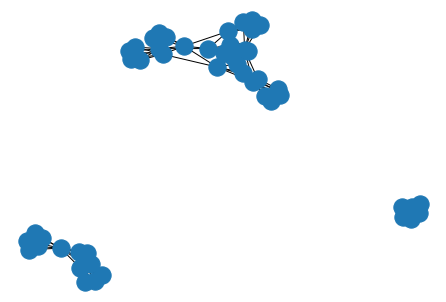

In [20]:
nx.draw(G)

# NU Teams

In [21]:
teams = []

# === [gen1uu] [Hipmonlee] RBY NU Zard + Egg + Water Spam ===

t1 = []

t1.append('Charizard')  
t1.append('Kabutops')  
t1.append('Dewgong')  
t1.append('Blastoise')  
t1.append('Exeggcute')  
t1.append('Mr. Mime')  
 
teams.append(t1)

# === [gen1uu] [Shellnuts] RBY NU Standard Charizard Arcanine ===

t2 = []

t2.append('Arcanine')  
t2.append('Charizard')  
t2.append('Venusaur')  
t2.append('Blastoise')  
t2.append('Clefable')  
t2.append('Mr. Mime')  
 
teams.append(t2)

# === [gen1uu] [Shellnuts] RBY NU PoryNido + Molt ===

t3 = []

t3.append('Moltres')  
t3.append('Blastoise') 
t3.append('Porygon')  
t3.append('Nidoking')  
t3.append('Clefable')  
t3.append('Mr. Mime')  
 
teams.append(t3)

# === [gen1uu] [Shellnuts] RBY NU BlastArc + Fearow ===

t4 = []

t4.append('Blastoise')
t4.append('Arcanine')  
t4.append('Venusaur')  
t4.append('Fearow')  
t4.append('Clefable')  
t4.append('Mr. Mime')  

teams.append(t4)
 
# === [gen1uu] [Sevi] RBY NU BlastArc + Nido + Seadra ===

t5 = []

t5.append('Arcanine')  
t5.append('Blastoise')  
t5.append('Nidoking')  
t5.append('Clefable')  
t5.append('Mr. Mime')  
t5.append('Seadra')  
 
teams.append(t5)

# === [gen1uu] [Sevi] RBY NU Venu + Pory ===

t6 = []

t6.append('Blastoise')  
t6.append('Venusaur')  
t6.append('Arcanine')  
t6.append('Porygon')  
t6.append('Clefable')  
t6.append('Mr. Mime')  

teams.append(t6)

# === [gen1uu] [Sevi] RBY NU Zard + PoryNido ===

t7 = []

t7.append('Charizard')  
t7.append('Porygon')  
t7.append('Blastoise')  
t7.append('Nidoking')  
t7.append('Clefable')  
t7.append('Mr. Mime')  
 
teams.append(t7)

# === [gen1uu] [Sevi] RBY NU Starters + Tops ===

t8 = []

t8.append('Charizard')  
t8.append('Venusaur') 
t8.append('Blastoise')
t8.append('Kabutops')  
t8.append('Clefable')  
t8.append('Mr. Mime')  

teams.append(t8)

# === [gen1uu] [Sevi] RBY NU Venu + BlastArc + Tops ===

t9 = []

t9.append('Venusaur')  
t9.append('Blastoise')  
t9.append('Arcanine')  
t9.append('Kabutops')  
t9.append('Clefable')  
t9.append('Mr. Mime')  

teams.append(t9)

# === [gen1uu] Fire Spam by Hipmonlee ===

t10 = []

t10.append('Charizard')  
t10.append('Dewgong')  
t10.append('Mr. Mime')  
t10.append('Moltres')
t10.append('Kabutops')  
t10.append('Venusaur')  

teams.append(t10)

In [22]:
print(len(teams))

10


In [23]:
for team in teams:
    for pok in team:
        if(pok in apariciones):
            apariciones[pok] += 1
        else:
            apariciones[pok] = 1
        G.add_node(pok, type1 = pokedex[pok]['type1'], type2 = pokedex[pok]['type2'])
        
        
edgeList = []
for team in teams:
    edgeList.append([x for x in it.combinations(team, 2)])

for perm in edgeList :
    for pokPair in perm :
        if G.has_edge(pokPair[0], pokPair[1]):
            G[pokPair[0]][pokPair[1]]['weight'] += 1
        else:
            G.add_edge(pokPair[0], pokPair[1], weight = 1)
G.edges.data('weight')

EdgeDataView([('Exeggutor', 'Starmie', 2), ('Exeggutor', 'Jolteon', 2), ('Exeggutor', 'Tauros', 1), ('Exeggutor', 'Articuno', 1), ('Exeggutor', 'Slowbro', 2), ('Exeggutor', 'Jynx', 1), ('Exeggutor', 'Alakazam', 1), ('Exeggutor', 'Mr. Mime', 1), ('Starmie', 'Jolteon', 1), ('Starmie', 'Jynx', 1), ('Starmie', 'Alakazam', 1), ('Starmie', 'Slowbro', 2), ('Starmie', 'Mr. Mime', 1), ('Starmie', 'Poliwrath', 1), ('Starmie', 'Cloyster', 1), ('Starmie', 'Lapras', 1), ('Starmie', 'Gyarados', 1), ('Jolteon', 'Tauros', 1), ('Jolteon', 'Electrode', 1), ('Jolteon', 'Zapdos', 1), ('Jolteon', 'Raichu', 1), ('Jolteon', 'Electabuzz', 1), ('Jolteon', 'Magneton', 1), ('Tauros', 'Chansey', 1), ('Tauros', 'Snorlax', 1), ('Tauros', 'Persian', 1), ('Tauros', 'Dodrio', 1), ('Tauros', 'Kangaskhan', 1), ('Articuno', 'Slowbro', 1), ('Articuno', 'Charizard', 1), ('Articuno', 'Zapdos', 1), ('Articuno', 'Dodrio', 1), ('Articuno', 'Moltres', 1), ('Articuno', 'Dragonite', 1), ('Slowbro', 'Jynx', 1), ('Slowbro', 'Alakaz

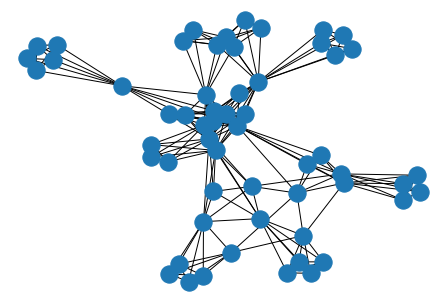

In [24]:
nx.draw(G)

# OU Teams

In [25]:
teams = []

# === [gen1ou] Standard MieDon [Lusch] ===

t1 = []

t1.append('Starmie')  
t1.append('Chansey')  
t1.append('Snorlax')  
t1.append('Exeggutor')  
t1.append('Tauros')  
t1.append('Rhydon')  

teams.append(t1)

# === [gen1ou] StarmieVicRhydon [FOMG] ===

t2 = []

t2.append('Starmie')  
t2.append('Chansey')  
t2.append('Snorlax')  
t2.append('Victreebel')  
t2.append('Tauros')  
t2.append('Rhydon')  

teams.append(t2)

# === [gen1ou] Amnesia Lax + BackGar [Kaz] ===

t3 = []

t3.append('Starmie')  
t3.append('Chansey')  
t3.append('Snorlax') 
t3.append('Exeggutor')  
t3.append('Tauros')  
t3.append('Gengar')  
 
teams.append(t3)

# === [gen1ou] SingChansey, JoltCloy [Troller] ===

t4 = []

t4.append('Starmie')  
t4.append('Chansey') 
t4.append('Snorlax')  
t4.append('Cloyster')  
t4.append('Tauros')  
t4.append('Jolteon')  

teams.append(t4)

# === [gen1ou] Standard Zam+Starmie ===

t5 = []

t5.append('Alakazam')  
t5.append('Chansey')  
t5.append('Snorlax')  
t5.append('Exeggutor')  
t5.append('Tauros')  
t5.append('Starmie')  

teams.append(t5)

# === [gen1ou] Zam + Lapras, Hyper Beam Spam [Maya Chansey] ===

t6 = []

t6.append('Alakazam')  
t6.append('Chansey')  
t6.append('Snorlax')  
t6.append('Exeggutor')  
t6.append('Tauros')  
t6.append('Lapras')  

teams.append(t6)

# === [gen1ou] Zam + Zapdos [Nails] ===

t7 = []

t7.append('Alakazam')  
t7.append('Exeggutor')  
t7.append('Tauros')  
t7.append('Snorlax')  
t7.append('Chansey')  
t7.append('Zapdos')  

teams.append(t7)

# === [gen1ou] BackZam + Psychic Slowbro Set-Up [HML am] ===

t8 = []

t8.append('Exeggutor')  
t8.append('Chansey')  
t8.append('Snorlax')
t8.append('Slowbro')  
t8.append('Tauros')  
t8.append('Alakazam')  
 
teams.append(t8)

# === [gen1ou] EggMieDon CounterChansey [Roudolf13] ===
t9 = []

t9.append('Exeggutor')  
t9.append('Chansey')  
t9.append('Snorlax')  
t9.append('Starmie')  
t9.append('Tauros')  
t9.append('Rhydon')  

teams.append(t9)

# === [gen1ou] Freeze Stall [Nails] ===

t10 = []

t10.append('Jynx')  
t10.append('Chansey')  
t10.append('Snorlax')  
t10.append('Starmie') 
t10.append('Tauros')  
t10.append('Jolteon')  

teams.append(t10)

# === [gen1ou] Jynx+Zapdos with ReflectBoomLax [Djokra] ===

t11 = []

t11.append('Jynx')  
t11.append('Chansey')  
t11.append('Snorlax')  
t11.append('Exeggutor')  
t11.append('Tauros')  
t11.append('Zapdos')  

teams.append(t11)


In [26]:
print(len(teams))

11


In [27]:
for team in teams:
    for pok in team:
        if(pok in apariciones):
            apariciones[pok] += 1
        else:
            apariciones[pok] = 1
        G.add_node(pok, type1 = pokedex[pok]['type1'], type2 = pokedex[pok]['type2'])
        
        
edgeList = []
for team in teams:
    edgeList.append([x for x in it.combinations(team, 2)])

for perm in edgeList :
    for pokPair in perm :
        if G.has_edge(pokPair[0], pokPair[1]):
            G[pokPair[0]][pokPair[1]]['weight'] += 1
        else:
            G.add_edge(pokPair[0], pokPair[1], weight = 1)
G.edges.data('weight')

EdgeDataView([('Exeggutor', 'Starmie', 6), ('Exeggutor', 'Jolteon', 2), ('Exeggutor', 'Tauros', 9), ('Exeggutor', 'Articuno', 1), ('Exeggutor', 'Slowbro', 3), ('Exeggutor', 'Jynx', 2), ('Exeggutor', 'Alakazam', 5), ('Exeggutor', 'Mr. Mime', 1), ('Exeggutor', 'Chansey', 8), ('Exeggutor', 'Snorlax', 8), ('Exeggutor', 'Rhydon', 2), ('Exeggutor', 'Gengar', 1), ('Exeggutor', 'Lapras', 1), ('Exeggutor', 'Zapdos', 2), ('Starmie', 'Jolteon', 3), ('Starmie', 'Jynx', 2), ('Starmie', 'Alakazam', 2), ('Starmie', 'Slowbro', 2), ('Starmie', 'Mr. Mime', 1), ('Starmie', 'Poliwrath', 1), ('Starmie', 'Cloyster', 2), ('Starmie', 'Lapras', 1), ('Starmie', 'Gyarados', 1), ('Starmie', 'Chansey', 7), ('Starmie', 'Snorlax', 7), ('Starmie', 'Tauros', 7), ('Starmie', 'Rhydon', 3), ('Starmie', 'Victreebel', 1), ('Starmie', 'Gengar', 1), ('Jolteon', 'Tauros', 3), ('Jolteon', 'Electrode', 1), ('Jolteon', 'Zapdos', 1), ('Jolteon', 'Raichu', 1), ('Jolteon', 'Electabuzz', 1), ('Jolteon', 'Magneton', 1), ('Jolteon', '

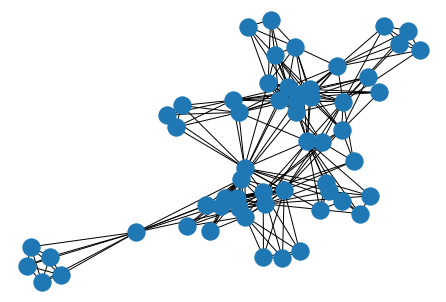

In [28]:
nx.draw(G)

# Stadium OU Teams

In [29]:
teams = []

# === [gen1stadium] RBY Stadium OU Sample 1 ===

team1 = []

team1.append('Alakazam')
team1.append('Tauros')  
team1.append('Exeggutor')  
team1.append('Zapdos')  
team1.append('Chansey')  
team1.append('Snorlax')  
 
teams.append(t1)    
    
# === [gen1ou] RBY Stadium OU Sample 2 ===

team2 = []

team2.append('Jynx')
team2.append('Alakazam') 
team2.append('Tauros')  
team2.append('Snorlax')  
team2.append('Chansey')  
team2.append('Golem')  

teams.append(team2)

In [30]:
print(len(teams))

2


In [31]:
for team in teams:
    for pok in team:
        if(pok in apariciones):
            apariciones[pok] += 1
        else:
            apariciones[pok] = 1
        G.add_node(pok, type1 = pokedex[pok]['type1'], type2 = pokedex[pok]['type2'])
        
        
edgeList = []
for team in teams:
    edgeList.append([x for x in it.combinations(team, 2)])

for perm in edgeList :
    for pokPair in perm :
        if G.has_edge(pokPair[0], pokPair[1]):
            G[pokPair[0]][pokPair[1]]['weight'] += 1
        else:
            G.add_edge(pokPair[0], pokPair[1], weight = 1)
G.edges.data('weight')

EdgeDataView([('Exeggutor', 'Starmie', 7), ('Exeggutor', 'Jolteon', 2), ('Exeggutor', 'Tauros', 10), ('Exeggutor', 'Articuno', 1), ('Exeggutor', 'Slowbro', 3), ('Exeggutor', 'Jynx', 2), ('Exeggutor', 'Alakazam', 5), ('Exeggutor', 'Mr. Mime', 1), ('Exeggutor', 'Chansey', 9), ('Exeggutor', 'Snorlax', 9), ('Exeggutor', 'Rhydon', 3), ('Exeggutor', 'Gengar', 1), ('Exeggutor', 'Lapras', 1), ('Exeggutor', 'Zapdos', 2), ('Starmie', 'Jolteon', 3), ('Starmie', 'Jynx', 2), ('Starmie', 'Alakazam', 2), ('Starmie', 'Slowbro', 2), ('Starmie', 'Mr. Mime', 1), ('Starmie', 'Poliwrath', 1), ('Starmie', 'Cloyster', 2), ('Starmie', 'Lapras', 1), ('Starmie', 'Gyarados', 1), ('Starmie', 'Chansey', 8), ('Starmie', 'Snorlax', 8), ('Starmie', 'Tauros', 8), ('Starmie', 'Rhydon', 4), ('Starmie', 'Victreebel', 1), ('Starmie', 'Gengar', 1), ('Jolteon', 'Tauros', 3), ('Jolteon', 'Electrode', 1), ('Jolteon', 'Zapdos', 1), ('Jolteon', 'Raichu', 1), ('Jolteon', 'Electabuzz', 1), ('Jolteon', 'Magneton', 1), ('Jolteon', 

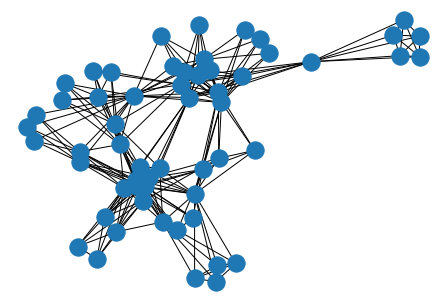

In [32]:
nx.draw(G)

# Ubers Teams

In [33]:
teams = []

# === [gen1ubers] Lutra's Team (went 9-0 in a mini tour and to round 4 in a 64 man tournament) ===

t1 = []

t1.append('Jynx')  
t1.append('Chansey')  
t1.append('Mewtwo')  
t1.append('Exeggutor')  
t1.append('Slowbro')  
t1.append('Mew')  

teams.append(t1)

# === [gen1ubers] marcoasd's team (Went 8-2 in the minitour and won the 64 man tournament) ===

t2 = []

t2.append('Tauros')  
t2.append('Mew')  
t2.append('Exeggutor')  
t2.append('Mewtwo')  
t2.append('Slowbro')  
t2.append('Snorlax')  
 
teams.append(t2)

# === [gen1ubers] Mr.378's team (Won a 32 man tournament) ===

t3 = []

t3.append('Jynx')  
t3.append('Chansey')  
t3.append('Snorlax')  
t3.append('Slowbro')  
t3.append('Mew')  
t3.append('Mewtwo')  
  
teams.append(t3)

# === [gen1ubers] Sunny's team (Runner-up in the 32 man tournament) ===

t4 = []

t4.append('Exeggutor')  
t4.append('Snorlax')  
t4.append('Zapdos')  
t4.append('Slowbro')  
t4.append('Mewtwo')  
t4.append('Mew')  

teams.append(t4)

# === [gen1ubers] 1st of 2 Teams that serial RBY winner Peasounay had ===

t5 = []

t5.append('Gengar')  
t5.append('Mewtwo')  
t5.append('Mew')  
t5.append('Snorlax')  
t5.append('Exeggutor')  
t5.append('Chansey')  

teams.append(t5)

# === [gen1ubers] 2nd of 2 Teams that serial RBY winner Peasounay had: ===

t6 = []

t6.append('Gengar')  
t6.append('Mewtwo')  
t6.append('Mew')
t6.append('Snorlax')  
t6.append('Chansey')  
t6.append('Slowbro')  

teams.append(t6)

# === [gen1ubers] Lutra's New Team (went 24-6 as RBY Ubers Veteran Trainer) ===

t7 = []

t7.append('Jynx')  
t7.append('Chansey')
t7.append('Mewtwo')
t7.append('Mew')
t7.append('Snorlax')
t7.append('Zapdos')

teams.append(t7)

In [34]:
print(len(teams))

7


In [35]:
for team in teams:
    for pok in team:
        if(pok in apariciones):
            apariciones[pok] += 1
        else:
            apariciones[pok] = 1
        G.add_node(pok, type1 = pokedex[pok]['type1'], type2 = pokedex[pok]['type2'])
        
        
edgeList = []
for team in teams:
    edgeList.append([x for x in it.combinations(team, 2)])

for perm in edgeList :
    for pokPair in perm :
        if G.has_edge(pokPair[0], pokPair[1]):
            G[pokPair[0]][pokPair[1]]['weight'] += 1
        else:
            G.add_edge(pokPair[0], pokPair[1], weight = 1)
G.edges.data('weight')

EdgeDataView([('Exeggutor', 'Starmie', 7), ('Exeggutor', 'Jolteon', 2), ('Exeggutor', 'Tauros', 11), ('Exeggutor', 'Articuno', 1), ('Exeggutor', 'Slowbro', 6), ('Exeggutor', 'Jynx', 3), ('Exeggutor', 'Alakazam', 5), ('Exeggutor', 'Mr. Mime', 1), ('Exeggutor', 'Chansey', 11), ('Exeggutor', 'Snorlax', 12), ('Exeggutor', 'Rhydon', 3), ('Exeggutor', 'Gengar', 2), ('Exeggutor', 'Lapras', 1), ('Exeggutor', 'Zapdos', 3), ('Exeggutor', 'Mewtwo', 4), ('Exeggutor', 'Mew', 4), ('Starmie', 'Jolteon', 3), ('Starmie', 'Jynx', 2), ('Starmie', 'Alakazam', 2), ('Starmie', 'Slowbro', 2), ('Starmie', 'Mr. Mime', 1), ('Starmie', 'Poliwrath', 1), ('Starmie', 'Cloyster', 2), ('Starmie', 'Lapras', 1), ('Starmie', 'Gyarados', 1), ('Starmie', 'Chansey', 8), ('Starmie', 'Snorlax', 8), ('Starmie', 'Tauros', 8), ('Starmie', 'Rhydon', 4), ('Starmie', 'Victreebel', 1), ('Starmie', 'Gengar', 1), ('Jolteon', 'Tauros', 3), ('Jolteon', 'Electrode', 1), ('Jolteon', 'Zapdos', 1), ('Jolteon', 'Raichu', 1), ('Jolteon', 'El

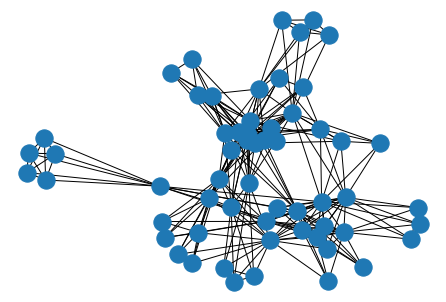

In [36]:
nx.draw(G)

# UU Teams

In [37]:
teams = []

# === [gen1uu] [Sceptross] Kadabra lead + BuzzNite ===

t1 = []

t1.append('Kadabra')  
t1.append('Tentacruel')  
t1.append('Hypno')  
t1.append('Electabuzz')  
t1.append('Dragonite')  
t1.append('Omastar')  

teams.append(t1)

# === [gen1uu] [Sceptross] Haunter + Omastar anti Wrap core ===

t2 = []

t2.append('Haunter')  
t2.append('Dugtrio') 
t2.append('Tentacruel')  
t2.append('Omastar')  
t2.append('Dragonite')  
t2.append('Hypno')  

teams.append(t2)

# === [gen1uu] [Sceptross] Hypno lead + Kanga + Haunter back ===

t3 = []

t3.append('Hypno')  
t3.append('Kadabra') 
t3.append('Dugtrio')  
t3.append('Kangaskhan')  
t3.append('Tentacruel')  
t3.append('Haunter')  

teams.append(t3)

# === [gen1uu] [Kaz] SubTenta lead + 3 attacks Vap ===

t4 = []

t4.append('Tentacruel')
t4.append('Vaporeon')  
t4.append('Hypno')  
t4.append('Haunter')  
t4.append('Dugtrio')  
t4.append('Dragonite')  

teams.append(t4)

# === [gen1uu] [Kaz] SDWrap Tenta lead + Tangela + AgiliWrap Dnite ===

t5 = []

t5.append('Tentacruel')  
t5.append('Omastar')  
t5.append('Tangela')  
t5.append('Hypno')  
t5.append('Dragonite')  
t5.append('Kadabra')  
  
teams.append(t5)

# === [gen1uu] [Lusch] Omastar+Dragonite ===

t6 = []

t6.append('Tentacruel')  
t6.append('Gyarados')  
t6.append('Dragonite')  
t6.append('Dugtrio')  
t6.append('Omastar')  
t6.append('Hypno')  

teams.append(t6)

# === [gen1uu] [Lusch] Gyarados+Dragonite ===

t7 = []

t7.append('Hypno')  
t7.append('Tentacruel')  
t7.append('Articuno')  
t7.append('Dragonite')  
t7.append('Gyarados')  
t7.append('Dugtrio')  
 
teams.append(t7)

# === [gen1uu] [Lusch] Persian+Kadabra ===

t8 = []

t8.append('Tentacruel')  
t8.append('Persian')  
t8.append('Kadabra')  
t8.append('Hypno')  
t8.append('Gyarados')  
t8.append('Kangaskhan')  
 
teams.append(t8)

# === [gen1uu] [tratchy] Golem + Dugtrio ===

t9 = [] 

t9.append('Tentacruel')  
t9.append('Hypno')  
t9.append('Gyarados')  
t9.append('Golem')  
t9.append('Dugtrio')  
t9.append('Kadabra')  
 
teams.append(t9)

# === [gen1uu] [Lusch] Omastar+Vaporeon ===

t10 = []

t10.append('Hypno')  
t10.append('Tentacruel')  
t10.append('Omastar')  
t10.append('Vaporeon')  
t10.append('Dugtrio')  
t10.append('Kangaskhan')  

teams.append(t10)

In [38]:
print(len(teams))

10


In [39]:
for team in teams:
    for pok in team:
        if(pok in apariciones):
            apariciones[pok] += 1
        else:
            apariciones[pok] = 1
        G.add_node(pok, type1 = pokedex[pok]['type1'], type2 = pokedex[pok]['type2'])
        
        
edgeList = []
for team in teams:
    edgeList.append([x for x in it.combinations(team, 2)])

for perm in edgeList :
    for pokPair in perm :
        if G.has_edge(pokPair[0], pokPair[1]):
            G[pokPair[0]][pokPair[1]]['weight'] += 1
        else:
            G.add_edge(pokPair[0], pokPair[1], weight = 1)
G.edges.data('weight')

EdgeDataView([('Exeggutor', 'Starmie', 7), ('Exeggutor', 'Jolteon', 2), ('Exeggutor', 'Tauros', 11), ('Exeggutor', 'Articuno', 1), ('Exeggutor', 'Slowbro', 6), ('Exeggutor', 'Jynx', 3), ('Exeggutor', 'Alakazam', 5), ('Exeggutor', 'Mr. Mime', 1), ('Exeggutor', 'Chansey', 11), ('Exeggutor', 'Snorlax', 12), ('Exeggutor', 'Rhydon', 3), ('Exeggutor', 'Gengar', 2), ('Exeggutor', 'Lapras', 1), ('Exeggutor', 'Zapdos', 3), ('Exeggutor', 'Mewtwo', 4), ('Exeggutor', 'Mew', 4), ('Starmie', 'Jolteon', 3), ('Starmie', 'Jynx', 2), ('Starmie', 'Alakazam', 2), ('Starmie', 'Slowbro', 2), ('Starmie', 'Mr. Mime', 1), ('Starmie', 'Poliwrath', 1), ('Starmie', 'Cloyster', 2), ('Starmie', 'Lapras', 1), ('Starmie', 'Gyarados', 1), ('Starmie', 'Chansey', 8), ('Starmie', 'Snorlax', 8), ('Starmie', 'Tauros', 8), ('Starmie', 'Rhydon', 4), ('Starmie', 'Victreebel', 1), ('Starmie', 'Gengar', 1), ('Jolteon', 'Tauros', 3), ('Jolteon', 'Electrode', 1), ('Jolteon', 'Zapdos', 1), ('Jolteon', 'Raichu', 1), ('Jolteon', 'El

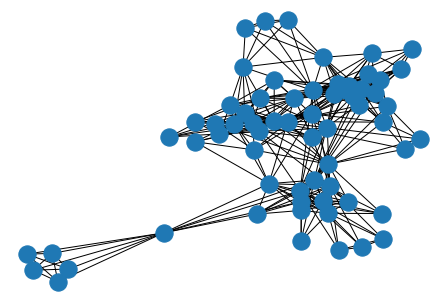

In [40]:
nx.draw(G)

In [41]:
print(apariciones)

{'Exeggutor': 17, 'Starmie': 11, 'Jolteon': 5, 'Tauros': 16, 'Articuno': 3, 'Slowbro': 9, 'Drowzee': 1, 'Slowpoke': 1, 'Abra': 1, 'Exeggcute': 2, 'Staryu': 1, 'Diglett': 1, 'Chansey': 19, 'Snorlax': 20, 'Persian': 2, 'Dodrio': 2, 'Kangaskhan': 4, 'Jynx': 7, 'Alakazam': 6, 'Mr. Mime': 11, 'Poliwrath': 1, 'Cloyster': 2, 'Lapras': 2, 'Gyarados': 5, 'Charizard': 7, 'Magmar': 1, 'Ninetales': 1, 'Moltres': 4, 'Arcanine': 6, 'Rapidash': 1, 'Zapdos': 6, 'Dragonite': 7, 'Electrode': 1, 'Raichu': 1, 'Electabuzz': 2, 'Magneton': 1, 'Aerodactyl': 1, 'Rhydon': 6, 'Golem': 4, 'Omastar': 6, 'Onix': 2, 'Kabutops': 5, 'Dugtrio': 8, 'Nidoking': 5, 'Sandslash': 1, 'Tentacruel': 11, 'Venomoth': 1, 'Victreebel': 2, 'Gengar': 4, 'Muk': 1, 'Dewgong': 2, 'Blastoise': 9, 'Venusaur': 6, 'Clefable': 8, 'Porygon': 3, 'Fearow': 1, 'Seadra': 1, 'Mewtwo': 7, 'Mew': 7, 'Kadabra': 5, 'Hypno': 10, 'Haunter': 3, 'Vaporeon': 2, 'Tangela': 1}


In [42]:
for pok in G.nodes :
    G.nodes[pok]['teams'] = apariciones[pok]

In [43]:
G.nodes.data()

NodeDataView({'Exeggutor': {'type1': 'Grass', 'type2': 'Psychic', 'teams': 17}, 'Starmie': {'type1': 'Water', 'type2': 'Psychic', 'teams': 11}, 'Jolteon': {'type1': 'Electric', 'type2': 'None', 'teams': 5}, 'Tauros': {'type1': 'Normal', 'type2': 'None', 'teams': 16}, 'Articuno': {'type1': 'Ice', 'type2': 'Flying', 'teams': 3}, 'Slowbro': {'type1': 'Water', 'type2': 'Psychic', 'teams': 9}, 'Drowzee': {'type1': 'Psychic', 'type2': 'None', 'teams': 1}, 'Slowpoke': {'type1': 'Water', 'type2': 'Psychic', 'teams': 1}, 'Abra': {'type1': 'Psychic', 'type2': 'None', 'teams': 1}, 'Exeggcute': {'type1': 'Grass', 'type2': 'Psychic', 'teams': 2}, 'Staryu': {'type1': 'Water', 'type2': 'None', 'teams': 1}, 'Diglett': {'type1': 'Ground', 'type2': 'None', 'teams': 1}, 'Chansey': {'type1': 'Normal', 'type2': 'None', 'teams': 19}, 'Snorlax': {'type1': 'Normal', 'type2': 'None', 'teams': 20}, 'Persian': {'type1': 'Normal', 'type2': 'None', 'teams': 2}, 'Dodrio': {'type1': 'Normal', 'type2': 'Flying', 'tea

In [44]:
nx.write_gexf(G, "Gen1Graph.gexf", version="1.2draft")